<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">

____    

**Complex Project #1: Identifying patterns that determine the market success of computer games** Khomkin Konstantin, cohort 53_DS
_____
**Research Description.**
    Based on public reports from Streamchick, an online store that sells computer games worldwide, historical data on game sales, user and expert ratings, genres and platforms (e.g. Xbox or PlayStation) are available. The goal is to identify the patterns that determine a game's success, which will allow betting on a potentially popular product and planning advertising campaigns.
Data up to 2016 is available for the study, with advertising campaigns planned for 2017 at the end of 2016. 
_____
**Research Objective.**
    The purpose of the study is to identify valid patterns in game sales data that can be applied to predict the success of subsequent advertising campaigns.
    
**Subject of the study.** 

To analyze the data that the company will use to develop key activities for next year's advertising campaign.
    
_____
**Research Objectives.**

To achieve the objectives of the study, it is necessary to perform data pre-processing (elimination of duplicates, omissions), conduct exploratory and statistical analysis of the data, create a user portrait and test hypotheses about similarities/differences of average user ratings of Xbox One and PC platforms and Action and Sports genres.
_____
**Source Data.**
    
A *.csv file with the following columns is available as raw data:
    
Name — the name of the game<br>
Platform — the platform<br>
Year_of_Release — year of release<br>
Genre — tha genre of the game<br>
NA_sales — sales in North America in millions of copies<br>
EU_sales — sales in Europe in millions of copies<br>
JP_sales — sales in Japan in millions of copies<br>
Other_sales — sales in other couintries in millions of copies<br>
Critic_Score — scores by critics (100 max)<br>
User_Score — scores by users (10 max)<br>
Rating — Entertainment Software Rating Board rating<br>
______

**This study will be divided into several steps.**

***Step 1: Examine data files, obtain general information, download libraries.***
    
***Step 2: Data Preparation.***
* [1. Replacing column titles.](#1-bullet)
* [2. Finding and correcting anomalies and errors.](#2-bullet)
* [3. Pass processing.](#3-bullet)
* [4. Calculating total sales in all regions.](#4-bullet)

***Step 3: Exploratory Data Analysis.***
* [1. Analyze sales by year, by platform.](#5-bullet)
* [2. Determine the actual period to analyze.](#6-bullet)
* [3. Identify the leading platforms.](#7-bullet)
* [4. Building a box-and-whisker chart of global game sales by platform.](#8-bullet)
* [5. Analyzing the impact of user and critic feedback on sales within a single popular platform.](#9-bullet)
* [6. Constructing a scatter plot and calculating the correlation between reviews and sales.](#10-bullet)
* [7. Analyze the overall distribution of games by genre.](#11-bullet)
    
***Step 4: Build a user portrait of each region.***
* [1. Top 5 platforms.](#12-bullet)
*** [2. Top 5 genres.](#13-bullet)
*** [3. ESRB Rating Impact.](#14-bullet)

***Step 5: Hypothesis Testing***
* [1. Average user ratings for Xbox One and PC platforms are the same.](#15-bullet)
* [2. Average user ratings of Action and Sports genres](#16-bullet).


## Step 1. 
Import the necessary libraries, open the data file and study the general information


In [1]:
import pandas as pd
import seaborn
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('datasets/games.csv')

#data.info()


In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Conclusion from the primary express analysis:

1. There are missing data in 4 columns, with one (critic_score) missing about 50% of the data 
2. Confusion in data types: Year_of_Release should be int, User_Score is more like float
3. Data and column names should be set to the same case and checked for duplicates

# Step 2. 
**Data preparation/preprocessing**

Let's convert the column names to lower case. We use rename() to avoid confusion in the sequence of column assignments and to carefully rename each header, although to rename all columns we could just use the shorter data.columns=[]

In [4]:
print(data.columns) 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [5]:
data.columns = data.columns.str.lower()


In [6]:
#data = data.rename(columns={
#    'Platform': 'platform',
#    'Year_of_Release': 'year_of_release',
#    'Genre': 'genre',
#   'NA_sales': 'na_sales',
#    'EU_sales': 'eu_sales',
#    'JP_sales': 'jp_sales',
#    'Other_sales': 'other_sales',
#    'Critic_Score': 'critic_score',
#    'User_Score': 'user_score',
#    'Rating': 'rating'
#})

In [7]:
print(data.columns) 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Matching the data types

In [8]:
data['year_of_release'].isna().sum() 

269

In the 'year_of_release' column there are gaps that do not allow type conversion. There are only 269 of them, just delete these rows (data about the year of release is important and without this column the value of the row is zero, you can try to search for exact matches in other rows, for example by game name, platform, rating and fill in the gaps in the year column, but for such a number of gaps it makes no sense.

In [9]:
data = data.dropna(subset=['year_of_release'])

In [10]:
data['year_of_release'].isnull().sum()

0

In [11]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [12]:
#data.info()

Everything worked out. The gaps were replaced with zeros and the data type of the 'year_of_release' column was set to int type

In [13]:
#data['user_score'] = data['user_score'].astype('float64') #приводим тип второго столбца

Some rows of the 'user_score' column are filled with text. Usually tbd denotes a value that is "to be determined later", tbd = "to be developed"
Let's count how many such values

In [14]:
data[data['user_score'] == 'tbd']['user_score'].count()

2376

2376 of 10,000 is a critical number. Maybe it's meaningful data. Let's see if we can replace them with, for example, zero?

In [15]:
data[data['user_score'] == '0']['user_score'].count() # '0' берём в кавычки, т.к. сейчас столбец пока еще имеет тип object

1

The actual value of '0' is only one in 10+ thousand. For convenience, we replace 'tbd' with '0'

In [16]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = '0' 

Once again we try to set the 'user_score' column type to float

In [17]:
data['user_score'] = data['user_score'].astype('float64')

In [18]:
#data.info()

Data types are given, we can deal with skips and duplicates. Remember that skips in release year and 'tbd' in user scores have already been replaced by '0'.

The main data omissions are in the columns related to scores and rating: 'critic_score', 'user_score' and 'rating'. Judging by the first 20 columns of the dataframe, these columns have no values for games released before 2005 (hypothesis). 

We will handle the omissions in the following way:

Let's delete a few rows where there are gaps in the 'genre' and 'name' columns. There are only from 2 to 4 of them (depending on whether the gaps are in different rows or possibly in the same rows), we will not even to save time to understand the nature of these gaps and will not look at what data in other columns of these rows.

In [19]:
data = data.dropna(subset=['name', 'genre']) #delete

The omissions in the 'name' and 'genre' columns have been dealt with. 

Replace omissions in ratings with the value 'unknown'.

In [20]:
data['rating'] = data['rating'].fillna('unknown') 

In [21]:
data_full = data #In order not to write the whole code further, I rename df 

Let's calculate total sales in all regions and add the corresponding column to the dataframe

In [22]:
# for calculation of sales we don't need data on rating and points, so we calculate in the full table
data_full['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis='columns') 
#data_full.info()

**Duplicate Processing**

In [23]:
data_full.duplicated().sum() #search and summarize obvious duplicates

0

no obvious duplicates

In [24]:
#data_full.duplicated(subset=['name','platform']).sum()
data_full.duplicated(subset=['name','platform']).sum()

#search for implicit duplicates in the "name"-"console/platform name" mapping

3

We found 3 rows with matches in the 'name' and 'platform' columns, let's display them:

In [25]:
data_full[data_full.duplicated(subset=['name','platform'])] 
# Let's take a look at these duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


In [26]:
data_full.query('name == "Need for Speed: Most Wanted" & platform == "X360"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25


In [27]:
data_full.query('name == "Need for Speed: Most Wanted" & platform == "PC"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T,0.08


In [28]:
data_full.query('name == "Madden NFL 13" & platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Wikipedia says that Need for Speed: Most Wanted was released in 2005 on both platforms, so the line with the specified year 2012 is wrong. And the error can be in any cell - in the name of the game, in the platform, in the year. 

If for the duplicate with the specified PC platform sales data for 2012 are small and there was clearly a one-time error, as in the case of a duplicate of the game NFL13 - in cell 16230 clearly some one-time upload, then with NFS is not all so clear, the data for 2005 and 2012 are too comparable.

My solution:
Delete the rows with the NFS game for 2012 (since they have a clear factual error in the game's release year), and delete row 16230 due to the small values in it and the presence of row 604 with clearly more complete data.

The approach is as follows: since we do not know the history and nature of the error, but the erroneous data has been identified, it is better to delete such data to reduce the error, rather than accumulate it in the data (by summarizing rows, etc.). 

**Total: delete the implicit duplicates, rows 1190, 11715 and 16230 - because they have identified data errors**

In [29]:
data_full.drop(labels = [1190, 11715, 16230],axis = 0, inplace = True) #delete

In [30]:
data_full.duplicated(subset=['name','platform']).sum() #check

0

In [31]:
data_full.reset_index(drop=True) #refresh indexes

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


# Step 3. 
**Do an exploratory analysis**

Researching how many games were released in different years

In [32]:
print(data_full.groupby('year_of_release').count()['platform']) 

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     650
2013     544
2014     581
2015     606
2016     502
Name: platform, dtype: int64


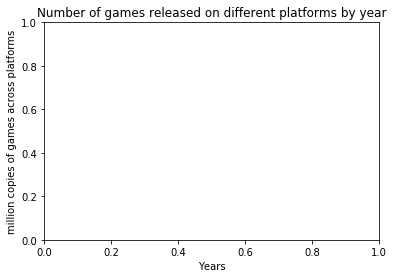

In [33]:
data_full.groupby('year_of_release').count()['platform'].plot
plt.title(label='Number of games released on different platforms by year')
plt.xlabel(xlabel='Years')
plt.ylabel(ylabel='million copies of games across platforms')

plt.show()


Less than 100 games per year were released before 1994, there is too little data to analyze, so it only makes sense to analyze data from 1994 onwards.

Let's see how sales have changed by platform. Let's choose the platforms with the highest total sales and plot the distribution by year.

In [34]:
data_full.groupby('platform').count()['name'] #look at how many games have been released on different platforms.

platform
2600     116
3DO        3
3DS      512
DC        52
DS      2121
GB        97
GBA      811
GC       542
GEN       27
GG         1
N64      316
NES       98
NG        12
PC       956
PCFX       1
PS      1190
PS2     2127
PS3     1305
PS4      392
PSP     1193
PSV      429
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1286
WiiU     147
X360    1231
XB       803
XOne     247
Name: name, dtype: int64

In [35]:
data_full.groupby('platform').sum().sort_values(by='total_sales', ascending=False)['total_sales'] #platform ranking by global sales

platform
PS2     1233.56
X360     959.68
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.68
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

We can see the gap between the leaders by several orders of magnitude. To analyze "by year" let's take the top 6 platforms, because the seventh (PS4) is more than twice behind the sixth (PS).

Let's define the list of top-6 platforms

In [36]:
top_platforms = data_full.groupby('platform').sum().sort_values(by='total_sales', ascending=False)['total_sales'].head(6)
top_platforms

platform
PS2     1233.56
X360     959.68
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
Name: total_sales, dtype: float64

In [37]:
top_platforms_list = list(top_platforms.index)
top_platforms_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

We have obtained a list of the top 6 platforms with the highest global sales. Let's plot the distribution of global game sales on these platforms by years and see the characteristic "lifetime" of games on the top platforms

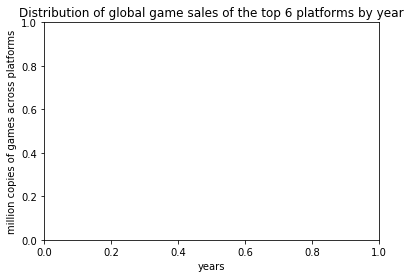

In [38]:
data_full_top = data_full.query('platform in @top_platforms_list')

data_full_plot = data_full_top.pivot_table(
        index='year_of_release', 
        values='total_sales', 
        columns='platform', 
        aggfunc=['sum']).plot
plt.title(label='Distribution of global game sales of the top 6 platforms by year')
plt.xlabel(xlabel='years')
plt.ylabel(ylabel='million copies of games across platforms')

plt.show()

The graph shows that the characteristic "life time" of the game is about 7-10 years, with the game completely losing its relevance in 10 years.

Thus, to make a forecast for 2017, it is necessary to use data for no more than 10 previous years. Older data will not be relevant.

For further analysis, we will limit the sample to current data:

In [39]:
max_year = data_full['year_of_release'].max()-3  #actual period of analysis - 3 years
data_full_actual = data_full.query('year_of_release >= @max_year') #make a proper query
#data_full_actual.info()
data_full_actual.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


We will analyze actual data on platform profitability and sales dynamics by year.

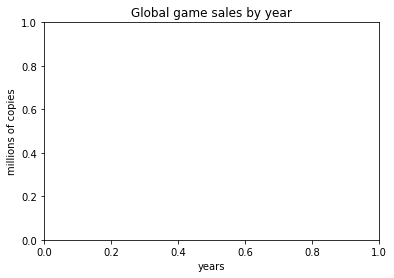

In [40]:
data_full_actual_pivot = data_full_actual.pivot_table(
    index='year_of_release', 
    values='total_sales', 
    columns='platform', 
    aggfunc=['sum'])


data_full_actual_plot = data_full_actual_pivot.plot


plt.title(label='Global game sales by year')
plt.xlabel(xlabel='years')
plt.ylabel(ylabel='millions of copies')

plt.show()

The graph of absolute values of sales is not very informative; the indicator "market share dynamics" is more important for analyzing dynamics. Let's try to calculate annual shares for all platforms and look at changes in shares by year. 
To do this, we need to calculate the total sales volume for each year.

In [41]:
data_full_actual_pivot.head()

sum                                                         \
platform           3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   WiiU   
year_of_release                                                                 
2013             56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59  21.65   
2014             43.76   NaN  13.28   47.76  100.00  0.24  11.90  3.75  22.03   
2015             27.78   NaN   8.52   16.82  118.90  0.12   6.25  1.14  16.35   
2016             15.14   NaN   5.25    3.60   69.25   NaN   4.25  0.18   4.60   

                               
platform          X360   XOne  
year_of_release                
2013             88.58  18.96  
2014             34.74  54.07  
2015             11.96  60.14  
2016              1.52  26.15

removed the multi-index

In [42]:
data_full_actual_pivot

sum                                                         \
platform           3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   WiiU   
year_of_release                                                                 
2013             56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59  21.65   
2014             43.76   NaN  13.28   47.76  100.00  0.24  11.90  3.75  22.03   
2015             27.78   NaN   8.52   16.82  118.90  0.12   6.25  1.14  16.35   
2016             15.14   NaN   5.25    3.60   69.25   NaN   4.25  0.18   4.60   

                               
platform          X360   XOne  
year_of_release                
2013             88.58  18.96  
2014             34.74  54.07  
2015             11.96  60.14  
2016              1.52  26.15

Add a column with the sum of all sales per year (world market volume)

In [43]:
data_full_actual_pivot['total_year_sales'] = data_full_actual.groupby('year_of_release').sum().sort_values(
    by='total_sales', 
    ascending=False)['total_sales'] #market volumes each year

In [44]:
data_full_actual_pivot

sum                                                         \
platform           3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   WiiU   
year_of_release                                                                 
2013             56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59  21.65   
2014             43.76   NaN  13.28   47.76  100.00  0.24  11.90  3.75  22.03   
2015             27.78   NaN   8.52   16.82  118.90  0.12   6.25  1.14  16.35   
2016             15.14   NaN   5.25    3.60   69.25   NaN   4.25  0.18   4.60   

                              total_year_sales  
platform          X360   XOne                   
year_of_release                                 
2013             88.58  18.96           361.24  
2014             34.74  54.07           331.53  
2015             11.96  60.14           267.98  
2016              1.52  26.15           129.94

In [45]:
data_full_actual_pivot

sum                                                         \
platform           3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   WiiU   
year_of_release                                                                 
2013             56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59  21.65   
2014             43.76   NaN  13.28   47.76  100.00  0.24  11.90  3.75  22.03   
2015             27.78   NaN   8.52   16.82  118.90  0.12   6.25  1.14  16.35   
2016             15.14   NaN   5.25    3.60   69.25   NaN   4.25  0.18   4.60   

                              total_year_sales  
platform          X360   XOne                   
year_of_release                                 
2013             88.58  18.96           361.24  
2014             34.74  54.07           331.53  
2015             11.96  60.14           267.98  
2016              1.52  26.15           129.94

In [46]:
data_full_actual_pivot_ratio

NameError: name 'data_full_actual_pivot_ratio' is not defined

In [ ]:
data_full_actual_boxplt = data_full_actual.pivot_table(
    index='year_of_release', 
    values='total_sales', 
    columns='platform', 
    aggfunc=['sum'])


data_full_actual_boxplt.boxplot(figsize=(30, 10), fontsize =15)

plt.title(label='Diagram of game sales values by platforms')
plt.xlabel(xlabel='platforms')
plt.ylabel(ylabel='million copies of games across platforms')

plt.show()

Here the results are more interesting. Based on the scatter diagram, we can distinguish 4 groups of platforms: 1) The undisputed leader, the PS4 platform. Taking into account the past chart of market shares, we can say that the platform immediately declared itself as a leader, the scatter is due to the fact that in the dynamics of the platform shows a steady growth in relative market share, while the current indicators are very good. 2) "Second echelon" - 3DS, DS, PS3, Wii, X360, XOne - relative market share of 15-20%. 3) The rest, which have not broken above 10% of the market in their history.

But in the diagram above we analyzed the market shares of platforms. Perhaps we can see something more interesting from the data on sales of specific games in a particular year? Let's test this hypothesis by building the diagram using the full data, not a summary table:

In [ ]:


# plot the scatter plot on the original complete data

seaborn.boxplot(x=data_full_actual['platform'], y=data_full_actual['total_sales'])

We can see many outliers with too large values, on their background quartiles are not even visible. Let's select a slice of data without such outliers

In [ ]:


# in the scatter plot we will make a slice of data without outliers, in order to see something on the diagram.
seaborn.boxplot(x=data_full_actual['platform'], y=data_full_actual['total_sales'])

plt.title(label='Chart of game sales value spread by platform')
plt.xlabel(xlabel='Platforms')
plt.ylabel(ylabel='million copies of games on different platforms')
plt.ylim(0, 2)
plt.show()

Intermediate conclusion: from the scatter plot of the full global sales data for the period from 2013 to 2016, we can only see that the values of the 2-3 quartiles of global sales of specific games on different platforms do not exceed the value of 0.75 million copies of games, and the median values rarely exceed the value of 0.25 million copies.
To be sure, let's plot a scatter chart of the top 6 platforms that have the highest cumulative sales by volume over the time period from 1980 to 2016:

In [ ]:
seaborn.boxplot(x=data_full_top['platform'], y=data_full_top['total_sales'])
plt.title(label='Chart of sales value spread of top-6 platform games')
plt.xlabel(xlabel='Platforms')
plt.ylabel(ylabel='million copies of games on different platforms')
plt.ylim(0, 2)
plt.show()

**Mini-conclusion:** the hypothesis that it will be possible to make some global conclusions based on the full data (and on the data of the top 6 platforms) was not confirmed. One conclusion: the expected sales figure is 0.25 mln copies of the game per year, the figure of more than 0.75 mln copies per year is a success for the game.

Exploring correlations within a single platform. What affects sales? **Hypothesis:** Perhaps user reviews or critics' evaluations have a strong influence on sales? Let's analyze the PS4 platform as the market share growth leader in recent years.

First, to investigate the relationship between sales and reviews, let's construct a scatter plot:

Let's look at the correlations

In [ ]:
crtitic_corr_PS4 = data_full_actual.query('platform == "PS4"')['critic_score'].corr(data_full_actual.query('platform == "PS4"')['total_sales'])
user_corr_PS4 = data_full_actual.query('platform == "PS4"')['user_score'].corr(data_full_actual.query('platform == "PS4"')['total_sales'])

print(f'Correlation of worldwide PS4 sales and critic scores: {crtitic_corr_PS4:.2%}')
print(f'Correlation of worldwide PS4 sales and user ratings: {user_corr_PS4:.2%}')


Very interesting results! Quite a noticeable correlation between worldwide sales of PS4 games and critics' scores, with about zero correlation with users' scores. 
and about zero correlation with user reviews. Technically, it's even negative.

For interest I checked similar correlations on two other platforms, Wii and X360 for a change

In [ ]:
crtitic_corr_Wii = data_full_actual.query('platform == "Wii"')['critic_score'].corr(data_full_actual.query('platform == "Wii"')['total_sales'])
user_corr_Wii = data_full_actual.query('platform == "Wii"')['user_score'].corr(data_full_actual.query('platform == "Wii"')['total_sales'])

crtitic_corr_X360 = data_full_actual.query('platform == "X360"')['critic_score'].corr(data_full_actual.query('platform == "X360"')['total_sales'])
user_corr_X360 = data_full_actual.query('platform == "X360"')['user_score'].corr(data_full_actual.query('platform == "X360"')['total_sales'])


print(f'Correlation of worldwide sales (Wii) and critic scores: {crtitic_corr_Wii:.2%}')
print(f'Correlation of worldwide sales (Wii) and user ratings: {user_corr_Wii:.2%}')

print(f'Correlation of worldwide sales (X360) and critic ratings: {crtitic_corr_X360:.2%}')
print(f'Correlation of worldwide sales (X360) and user ratings: {user_corr_X360:.2%}')

Let's analyze the distribution of the number of games sold and total sales by genre. For the whole period 1980-2016 and for the current period 2013-2016

In [ ]:
data_full.groupby('genre').count().sort_values(by='total_sales', ascending=False)['total_sales']
#genre ranking by number of games sold for the entire period 1980-2016

In [ ]:
data_full_actual.groupby('genre').count().sort_values(by='total_sales', ascending=False)['total_sales'] 
#genre ranking by number of games sold for the period 2013-2016

In terms of the number of games sold, the Action genre is uninterruptedly in the lead, followed by Puzzle

In [ ]:
data_full.groupby('genre').sum().sort_values(by='total_sales', ascending=False)['total_sales']
#genre ranking by worldwide sales for the entire period 1980-2016 #genre ranking by worldwide sales for the entire period 1980-2016

In [ ]:
data_full_actual.groupby('genre').sum().sort_values(by='total_sales', ascending=False)['total_sales'] 
#genre ranking by worldwide sales for the period 2013-2016

In [ ]:
data_full.groupby('genre').mean().sort_values(by='total_sales', ascending=False)['total_sales'] 
#ranking genres by average sales over the entire 1980-2016 period #ranking genres by worldwide sales over the entire 1980-2016 period

In [ ]:
data_full_actual.groupby('genre').mean().sort_values(by='total_sales', ascending=False)['total_sales'] 
#ranking genres by average sales from 2013-2016

Conclusion: Action and Sports genres traditionally lead in global sales, while Strategy, Puzzle and Adventure are outsiders

**Step 4.** Create a user profile for each region

Identify the top 5 platforms and top 5 genres for each macro-region (Europe, North America, Japan). We will analyze actual data for the period from 2006 to 2016

In [ ]:
#To analyze market shares, let's calculate total sales for each region

eu_total_sales_actual = data_full_actual['eu_sales'].sum()
print(f'European sales for 2013-2016: {eu_total_sales_actual:.2f}')

na_total_sales_actual = data_full_actual['na_sales'].sum()
print(f'North American sales for 2013-2016: {na_total_sales_actual:.2f}')

jp_total_sales_actual = data_full_actual['jp_sales'].sum()
print(f'Sales in Japan for 2013-2016: {jp_total_sales_actual:.2f}')

In [ ]:
print('Top 5 platforms in the Europe region (million copies):', 
      data_full_actual.groupby('platform').sum().sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5))
print()
print('Top 5 platforms in the North America region (million copies):',
      data_full_actual.groupby('platform').sum().sort_values(by='na_sales', ascending=False)['na_sales'].head(5))
print()
print('Top 5 platforms in Japan region (million copies):',
      data_full_actual.groupby('platform').sum().sort_values(by='na_sales', ascending=False)['na_sales'].head(5))


In [ ]:
# in market shares
print('Platform market shares in Europe region (market share):', data_full_actual.groupby('platform').sum().sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5) / eu_total_sales_actual)
print()
print('Platform market shares in the North America region (market share):', data_full_actual.groupby('platform').sum().sort_values(by='na_sales', ascending=False)['na_sales'].head(5) / na_total_sales_actual)
print()
print('Platform market shares in Japan region (market share):', data_full_actual.groupby('platform').sum().sort_values(by='jp_sales', ascending=False)['jp_sales'].head(5) / jp_total_sales_actual)


In [ ]:
print('Top 5 genres in the Europe region (million copies):',
      data_full_actual.groupby('genre').sum().sort_values(by='eu_sales', ascending=False)['eu_sales'].head(5))
print()
print('Top 5 genres in the North America region (million copies):',
      data_full_actual.groupby('genre').sum().sort_values(by='na_sales', ascending=False)['na_sales'].head(5))
print()
print('Top 5 genres in Japan region (million copies):',
      data_full_actual.groupby('genre').sum().sort_values(by='jp_sales', ascending=False)['jp_sales'].head(5))


**Conclusion:** Analysis of the top 5 platforms and genres showed that:
1. User preferences differ greatly in different macro-regions. According to the sales results for the last 10 years (hereinafter - in physical terms), the PS3 platform is the leader in Europe, the X360 in North America, and the DS in Japan. The leading platforms in each region have about 25% of the market, the second platform lags behind with about 18-19% of the market share

2. Genre preferences are more interesting. Culturally, North America and Europe are much closer, and there gaming preferences are similar across the top four genres. Japan prefers role-playing games, while shooters are not in the top 5 at all.


The influence of ESRB rating on sales in the region can be checked by comparing the distribution of sales data with the grouping by rating. This may not be a completely correct analysis, since game rating and game genre are related, and it is not obvious what is more important in consumer preferences - ESRB rating or just game genre.

In [ ]:
print('Ranking of ESRB ratings in the Europe region (million copies):',
      data_full_actual.groupby('rating').sum().sort_values(by='eu_sales', ascending=False)['eu_sales'])
print()
print('ESRB rating in the North America region (million copies):',
      data_full_actual.groupby('rating').sum().sort_values(by='na_sales', ascending=False)['na_sales'])
print()
print('ESRB ranking in the Japan region (million copies):',
      data_full_actual.groupby('rating').sum().sort_values(by='jp_sales', ascending=False)['jp_sales'])

**Conclusion:** The hypothesis that the rating is some key factor of consumer preferences is rather disproved. The 1st 2 places are shared by E (9+ years old) and M (17+ years old) ratings with very close figures. Japan generally leads in sales of unrated games.

**Step 5** Let's test the hypotheses.

(1) The average user ratings of the Xbox One and PC platforms are the same. **The null hypothesis** in this case is "ratings are not the same", the alternative (working) hypothesis is "ratings are the same".

(2) The average user ratings of Action and Sports genres are different. **The null hypothesis** here is again "the ratings are different" (this is the working hypothesis), the alternative hypothesis is "the ratings are the same"

For this purpose, let's use the method for testing the hypothesis of equality of the mean of two general populations by the samples taken from them: scipy.stats.ttest_ind . We analyze actual data from 2006-2016, and only those with ratings data. Here we need a caveat: there is not a lot of data in the dataset, and we can simply compare the average values, but we assume that we have some sample of sales and ratings data in the dataset, i.e. the data is not complete. Moreover, we can examine only those rows where there is information about ratings, and this is not a complete table.

In [ ]:
data_rating_actual = data_full.query('year_of_release >= @max_year and user_score>0') #considered the "stubs" and did not include them in the cutoffs


alpha = .2 # we set the critical level of statistical significance to 0.2, i.e. we are ready to make a decision with a probability of 80%.
# if p-value turns out to be less than it - reject the hypothesis

results = st.ttest_ind(
    data_rating_actual.query('platform == "XOne"')['user_score'], 
    data_rating_actual.query('platform == "PC"')['user_score'])

print('p-value:', results.pvalue) 

if (results.pvalue < alpha ): 
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

In [ ]:

alpha = .2 # let's set the critical level of statistical significance at 0.2, i.e. we are ready to make a decision with a probability of 80%.
# if p-value turns out to be less than it - reject the hypothesis


results = st.ttest_ind(
    data_rating_actual.query('genre == "Action"')['user_score'], 
    data_rating_actual.query('genre == "Sports"')['user_score'])

print('p-value:', results.pvalue) 

if (results.pvalue < alpha ): 
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

### General project conclusions

Researched game sales data across multiple platforms, including the regions of Europe, North America, Japan from 1980 to 2016.

Calculated total sales in all regions and added a corresponding column to analyze relative market shares.

Researched game sales data by year, found that less than 100 games per year were released before 1994, the data is too small to analyze, so it makes sense to analyze only data from 1994 onwards.


A list of the top 6 platforms is identified
['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'].

with the highest worldwide sales. The characteristic "life time" of games on the top platforms was determined, which is 7-10 years, and for 10 years the game completely loses its relevance. At the same time the period of significant changes in the games market is 3 years.

**So, to make a forecast for 2017 you should use data for no more than 3 previous years. Older data will not be relevant.**

Based on the graphical analysis of market shares occupied by platforms, it was revealed that since 2013 there was a significant "redistribution" of the platform market and since 2014 there has been a confident leader **in terms of relative market share growth** - PS4 platform, the only one that "dashingly" overcame the threshold of **30%** and retained its position.

**Answering the question "choose potentially profitable platforms":** market share growth is expected only for PS4, though judging by the chart the growth rate is decreasing and saturation is possible soon, two more platforms still have good shares: XOne (about 20% and the share is starting to decrease) and 3DS (13% share is stable, but the platform is already 5 years old and at any moment the market share may start to decrease due to the leaders' influence).




Several "box-and-whisker" charts of global total game sales by platform have been constructed.It has been revealed that there are platforms that have "broken out" in the area of high median sales (platforms **PS3, PS4, X360**), but they also have the highest spread of values. At the same time, there are platforms with more stable but low results. Here it is important to remember that the annual sales figure itself is not informative - the dynamics by years is important and the most important thing is the relative market shares. 

Based on the analysis of the scatter diagram of the relative market shares data, the results are more interesting. **We can distinguish 4 groups of platforms:** 1) The undisputed leader, the **PS4** platform. Taking into account the past chart of market shares, we can say that the platform immediately declared itself as a leader, the scatter is due to the fact that in dynamics the platform shows a steady growth of relative market share, while the current indicators are very good.2) "Second echelon" - platforms **3DS, PS3, X360, XOne** - relative market share of 15-20%.3) The rest, which have not broken above 10% of the market in their entire history.We tested the hypothesis that from the data on sales of specific games in a particular year we can see something more informative, for this purpose we built a scatter diagram on the full data, rather than on a summary table with grouping by platform. 

The conclusion is that the scatter plot of total worldwide sales for the period from 2013 to 2016 shows only that the **2-3 quartiles** of worldwide sales of specific games on different platforms **do not exceed the value of 0.75 million copies** of games, and the median values rarely exceed the value of **0.25 million copies**.
To be sure, a scatter plot of the **top 6 platforms** that have the highest cumulative in-kind sales over the current time period from 1980 to 2016 is plotted:The hypothesis that any global conclusions could be drawn from the full data (and from the top-6 platforms) was not confirmed. **One conclusion is that the "hospital average" expected sales figure would be 0.25 million copies of a game per year, a figure of more than 0.75 million copies per year is a success for a game.**

Investigated correlations within a single platform, what influences sales? **Hypothesis tested:** "User reviews or critics' evaluations have a strong influence on sales". The analysis is based on the sales of games on the PS4 platform as the market share growth leader in recent years.


**PS4 Worldwide Sales and Critics' Charts Correlation: 40.32%
Correlation between worldwide PS4 sales and user ratings: -0.67%**
There is a fairly significant correlation between worldwide sales of PS4 games and critics' scores, with a near-zero correlation with user ratings. 
and about zero correlation with user ratings. Technically, it's even negative.

For completeness of the experiment we checked similar correlations on two other platforms: Wii and X360

**Correlation between worldwide sales (Wii) and critics' ratings: 17.97%.
Correlation between worldwide sales (Wii) and user ratings: 12.98%
Correlation of worldwide sales (X360) and critical acclaim: 39.66%
Correlation of worldwide sales (X360) and user ratings: 13.63%**

Critics' scores show a direct, medium-weak correlation with worldwide sales figures. User ratings have no correlation with sales.


We analyzed the distribution of the number of games sold and total sales by genre.For the entire period 1980-2016 and up to date 2013-2016The genres **Action** and **Sports** have traditionally led the way in terms of worldwide gross sales, with **Strategy**, **Puzzle** and **Adventure** being the outsiders
While the **Action** genre leads in terms of "gross" sales, if we look at average sales by game, we find that the **Shooter** genre is in the lead (2013-2016).That is, if we talk about the success of a particular game, on average more than 1.2 million copies are sold.

The preferences of users in each region were analyzedThe top 5 platforms and top 5 genres for each macro-region (**Europe, North America, Japan**) based on current data for the period from 2013 to 2016 were determined

Total sales in Europe 2013-2016 гг.: 392.23 (millions of copies)<br>
Total sales in North America 2013-2016 гг.: 437.71 (millions of copies)<br>
Total sales in Japan 2013-2016 гг.: 140.78 (millions of copies)<br>

Top 5 platforms in the Europe region (million copies): <br>
PS4     141.09<br>
PS3      67.81<br>
XOne     51.59<br>
X360     42.52<br>
3DS      30.96<br>


Top 5 platforms in the North America region (million copies): <br>
PS4     108.74<br>
XOne     93.12<br>
X360     81.66<br>
PS3      63.50<br>
3DS      38.20<br>


Top 5 platforms in the Japan region (million copies): <br>
PS4     108.74<br>
XOne     93.12<br>
X360     81.66<br>
PS3      63.50<br>
3DS      38.20<br>


Platform market shares in the Europe region (market share): <br>
PS4     0.359712<br>
PS3     0.172883<br>
XOne    0.131530<br>
X360    0.108406<br>
3DS     0.078933<br>

Platform market shares in the North America region (market share): <br>
PS4     0.248429<br>
XOne    0.212744<br>
X360    0.186562<br>
PS3     0.145073<br>
3DS     0.087272<br>

Platform market shares in the Japan region (market share): <br>
3DS     0.481674<br>
PS3     0.165862<br>
PSV     0.132050<br>
PS4     0.113368<br>
WiiU    0.077284<br>

Top 5 genres in the Europe region (million copies): <br>
Action          118.13<br>
Shooter          87.86<br>
Sports           60.52<br>
Role-Playing     36.97<br>
Racing           20.19<br>

Top 5 genres in the North America region (million copies): <br>
Action          126.05<br>
Shooter         109.74<br>
Sports           65.27<br>
Role-Playing     46.40<br>
Misc             27.49<br>

Top 5 genres in the Japan region (million copies): <br>
Role-Playing    51.04<br>
Action          40.49<br>
Misc             9.20<br>
Fighting         7.65<br>
Shooter          6.61<br>




An analysis of the top 5 platforms and genres showed that:
1.	User preferences vary greatly across macro-regions. According to the sales results for the last 3 years (hereinafter - in physical terms), the PS4 platform is the leader in Europe (36%) and North America (25%), while in Japan -3DS (48%).  The leading platforms in each region occupy about 25% of the market, with the second platform lagging behind with about 18-19% of the market share
2.	Genre preferences are more interesting. Culturally, North America and Europe are much closer, and game preferences are similar across the top four genres. Japan prefers role-playing games, while shooters are not in the top 5 at all.


The impact of the **ESRB** rating on sales in the region is determined by comparing the distribution of sales data with the grouping by rating. 



Ranking of "ESRB ratings" in the Europe region (million copies): <br>
M          145.32<br>
E           83.36<br>
unknown     78.91<br>
E10+        42.69<br>
T           41.95<br>

Ranking of "ESRB ratings" in the North America region (million copies): <br>
M          165.21<br>
unknown     89.42<br>
E           79.05<br>
E10+        54.24<br>
T           49.79<br>

Ranking of "ESRB ratings" in the Japan region (million copies): <br>
unknown    85.05<br>
T          20.59<br>
E          15.14<br>
M          14.11<br>
E10+        5.89<br>

**The hypothesis that the rating is a key factor of consumer preferences is rather disproved.** 1-2 places are shared by **E** (9+ years old) and **M** (17+ years old) ratings with very close indicators. In Japan in general, sales of games without North American ratings are leading, which probably indicates that games popular on the Japanese domestic market are not even included in North American ratings, as they are not represented on the North American market


Statistical analysis of user ratings was performed, and two hypotheses were tested:
**(1)** The average user ratings of **Xbox One** and **PC** platforms are the same.  We can conclude that we do not have sufficient grounds to claim that the average user ratings of Xbox One and PC platforms are significantly different. Let's test the second hypothesis in the same way
**(2)** The average user ratings of **Action** and **Sports** genres are different. It can be concluded that we do not have enough evidence to claim that the average user ratings of players of 'Action' and 'Sports' genres are meaningfully different.
For this purpose, we used the method of testing the hypothesis of equality of the mean of two general populations by the samples taken from them: **scipy.stats.ttest_ind**. Actual data from 2006-2016 were used for the analysis, and only those with ratings data were used.


**General conclusions of the project**

Identified key patterns and consumer preferences in different markets. When launching a new product on the market it is possible to use these results, for example, in the Japanese market the best selling games in the genre **Role-Playing** on the **3DS** platform, in this case user ratings are not so important, and it is not necessary to get ESBR rating for sales on the Japanese market.



